In [7]:
from crawler_utils import *
from crawl_word_vocabulary_dot_com import *
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
lesson_df = pd.read_csv('../Lesson/lessons_with_id.csv')
lesson_df.head()

,Lesson Name,Lesson Link,Collection ID,Lesson ID
0,Prologue–Chapter 1,/lists/6078029,1,1
1,Chapters 2–3,/lists/6078030,1,2
2,Chapters 4–5,/lists/6078037,1,3
3,Chapters 6–9,/lists/6078038,1,4
4,February Vocabulary Words,/lists/7626191,2,5


# 1. Crawl the words of each lesson in vocabulary.com

In [3]:
lesson_chunk_example = lesson_df.iloc[0:5]
get_and_save_words_of_lesson(lesson_chunk_example, "test_chunks/chunk_1.csv")

Getting words of Prologue–Chapter 1 (1)
Getting words of Chapters 2–3 (2)
Getting words of Chapters 4–5 (3)
Getting words of Chapters 6–9 (4)
Getting words of February Vocabulary Words (5)


In [4]:
chunks = split_df_into_chunks(lesson_df, 25)

In [5]:
chunks[-1]

,Lesson Name,Lesson Link,Collection ID,Lesson ID
7416,Chapters 7–12,/lists/8071675,1606,7417
7417,Chapter 13–Epilogue,/lists/8071679,1606,7418
7418,Chapters 1–3,/lists/2839407,1607,7419
7419,Chapters 4–7,/lists/2839478,1607,7420
7420,Chapters 8–12,/lists/2839481,1607,7421
...,...,...,...,...
7699,Chapters 18–26,/lists/9551739,1662,7700
7700,Chapter 27–Epilogue,/lists/9551740,1662,7701
7701,Chapters 1–9,/lists/8366854,1663,7702
7702,Chapters 10–15,/lists/8366861,1663,7703


In [6]:
processes = []
output_dir = "raw_word_chunks"
try:
    for index, chunk in enumerate(chunks):
        output_path = f"{output_dir}/chunk_{index}.csv"
        p = Process(target=get_and_save_words_of_lesson, args=(chunk, output_path))
        processes.append(p)
        p.start()
        print(f"Started process for chunk {index}")
        sleep(2) # Wait for initializing the driver
        
    for index, p in enumerate(processes):
        p.join()
        print(f"Process {index} finished")
except Exception as e:
    for index, p in enumerate(processes):
        p.terminate()
        print(f"Process {index} finished")

Started process for chunk 0
Getting words of Prologue–Chapter 1 (1)
Started process for chunk 1
Getting words of Chapters 2–3 (2)
Getting words of Plot Development (310)
Getting words of Chapters 4–5 (3)
Started process for chunk 2
Getting words of Chapters 6–9 (4)
Getting words of February Vocabulary Words (5)
Getting words of List 9 (619)
Getting words of This Week in Words: Current Events Vocab for February 2–February 8, 2025 (6)
Getting words of Rhetorical Devices (311)
Getting words of This Week in Words: Current Events Vocab for February 9–February 15, 2025 (7)
Started process for chunk 3
Getting words of Chapters 1–3 (312)
Getting words of This Week in Words: Current Events Vocab for February 16–February 22, 2025 (8)
Getting words of This Week in Words: Current Events Vocab for February 23–March 1, 2025 (9)
Getting words of Chapters 4–7 (313)
Getting words of Act IV (928)
Getting words of List 10 (620)
Started process for chunk 4
Getting words of Travel (10)
Getting words of Cha

In [7]:
for index, p in enumerate(processes):
    p.terminate()
    print(f"Process {index} finished")

Process 0 finished
Process 1 finished
Process 2 finished
Process 3 finished
Process 4 finished
Process 5 finished
Process 6 finished
Process 7 finished
Process 8 finished
Process 9 finished
Process 10 finished
Process 11 finished
Process 12 finished
Process 13 finished
Process 14 finished
Process 15 finished
Process 16 finished
Process 17 finished
Process 18 finished
Process 19 finished
Process 20 finished
Process 21 finished
Process 22 finished
Process 23 finished
Process 24 finished
Process 25 finished
Process 26 finished
Process 27 finished
Process 28 finished
Process 29 finished


In [8]:
# Combine these chunk outputs
chunk_dfs = []

for i in range(len(chunks)):
    chunk_df = pd.read_csv(f"{output_dir}/chunk_{i}.csv")
    chunk_dfs.append(chunk_df)
    
len(chunk_dfs)

25

In [10]:
raw_word_df = pd.concat(chunk_dfs, ignore_index=True)
print(f"Total number of words: {len(raw_word_df)}")
raw_word_df.head()

Total number of words: 250228


,Word,Lesson ID
0,dignity,1
1,saunter,1
2,manuscript,1
3,reside,1
4,sufficient,1


In [11]:
raw_word_df.to_csv("raw_word_df.csv", index=False)

In [16]:
# Number of words by lesson

lesson_word_counts = raw_word_df.groupby(by='Lesson ID').size().reset_index(name='word_count')
lesson_word_counts = lesson_word_counts.sort_values(by='Lesson ID')
lesson_word_counts.head()

,Lesson ID,word_count
0,1,30
1,2,25
2,3,25
3,4,35
4,5,16


In [28]:
lesson_word_counts["word_count"].value_counts()

word_count
40     2739
35     1346
30      936
25      636
20      607
       ... 
145       1
148       1
152       1
136       1
59        1
Name: count, Length: 86, dtype: int64

<Axes: ylabel='Frequency'>

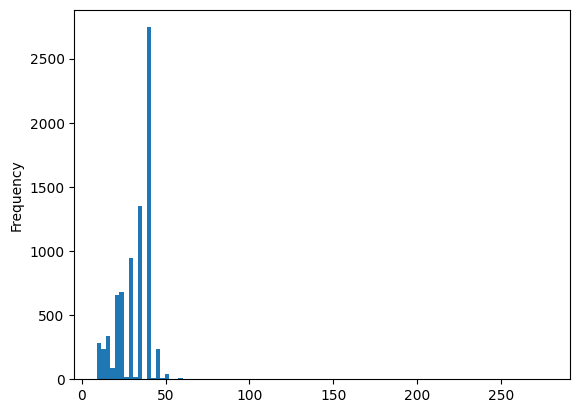

In [20]:
lesson_word_counts["word_count"].plot.hist(bins=100)

In [26]:
lesson_word_counts[lesson_word_counts["word_count"] > 50].iloc[0]

Lesson ID     1457
word_count      65
Name: 1456, dtype: int64

In [27]:
lesson_df[lesson_df["Lesson ID"] == 1457]

,Lesson Name,Lesson Link,Collection ID,Lesson ID
1456,Black and Gray,/lists/9062952,321,1457


In [29]:
raw_word_df_with_lesson = pd.merge(raw_word_df, lesson_df, on="Lesson ID", how="left")
raw_word_df_with_lesson.head()

,Word,Lesson ID,Lesson Name,Lesson Link,Collection ID
0,dignity,1,Prologue–Chapter 1,/lists/6078029,1
1,saunter,1,Prologue–Chapter 1,/lists/6078029,1
2,manuscript,1,Prologue–Chapter 1,/lists/6078029,1
3,reside,1,Prologue–Chapter 1,/lists/6078029,1
4,sufficient,1,Prologue–Chapter 1,/lists/6078029,1


In [34]:
thres_hold = 40

lesson_word_counts = raw_word_df_with_lesson.groupby(by=['Lesson ID', 'Collection ID']).size().reset_index(name='word_count')
lesson_word_counts.head()

,Lesson ID,Collection ID,word_count
0,1,1,30
1,2,1,25
2,3,1,25
3,4,1,35
4,5,2,16


In [35]:
lesson_word_counts_threshold = lesson_word_counts[lesson_word_counts["word_count"] < thres_hold]

# Number of collection
lesson_word_counts_threshold["Collection ID"].nunique()

1157

In [36]:
raw_word_df.head()

,Word,Lesson ID
0,dignity,1
1,saunter,1
2,manuscript,1
3,reside,1
4,sufficient,1


# 2. Reduce data

## 2.1 A lesson should only have max 20 words

In [75]:
raw_word_df = pd.read_csv("raw_word_df.csv")

word_series = []

index = 0

random.seed(42)

while index < len(raw_word_df):
    limit_words = random.randint(10, 20)
    
    num_of_words = 0
    
    current_lesson_id = raw_word_df.iloc[index]["Lesson ID"]
    
    while index < len(raw_word_df) and num_of_words < limit_words and raw_word_df.iloc[index]["Lesson ID"] == current_lesson_id:
        word_series.append(raw_word_df.iloc[index])
        num_of_words += 1
        index += 1
        
    
    if raw_word_df.iloc[index]["Lesson ID"] == current_lesson_id:
        # Go to next lesson id
        while index < len(raw_word_df) and raw_word_df.iloc[index]["Lesson ID"] == current_lesson_id:
            index += 1
        
        
# Create a new dataframe
raw_word_df_constraint_20 = pd.DataFrame(word_series)
raw_word_df_constraint_20.head()

,Word,Lesson ID
0,dignity,1
1,saunter,1
2,manuscript,1
3,reside,1
4,sufficient,1


<Axes: ylabel='Frequency'>

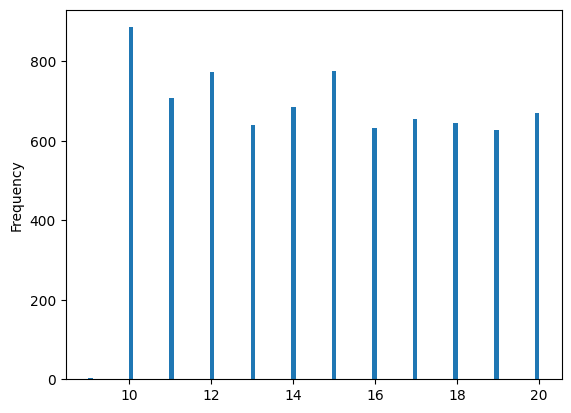

In [76]:
raw_word_df_constraint_20_word_counts = raw_word_df_constraint_20.groupby(by='Lesson ID').size().reset_index(name='word_count')
raw_word_df_constraint_20_word_counts["word_count"].plot.hist(bins=100)

In [77]:
print("Number of words after limit 20 words", len(raw_word_df_constraint_20))

Number of words after limit 20 words 113739


In [78]:
raw_word_df_constraint_20.to_csv("raw_word_df_limit.csv", index=False)

## 2.2 Limit lessons of each collection (Don't need anymore)

In [46]:
lesson_df = pd.read_csv('../Lesson/lessons_with_id.csv')
lesson_df.head()

,Lesson Name,Lesson Link,Collection ID,Lesson ID
0,Prologue–Chapter 1,/lists/6078029,1,1
1,Chapters 2–3,/lists/6078030,1,2
2,Chapters 4–5,/lists/6078037,1,3
3,Chapters 6–9,/lists/6078038,1,4
4,February Vocabulary Words,/lists/7626191,2,5


In [47]:
lesson_count_by_collection = lesson_df.groupby(by='Collection ID').size().reset_index(name='lesson_count')
lesson_count_by_collection.head()

,Collection ID,lesson_count
0,1,4
1,2,5
2,3,5
3,4,4
4,5,3


<Axes: ylabel='Frequency'>

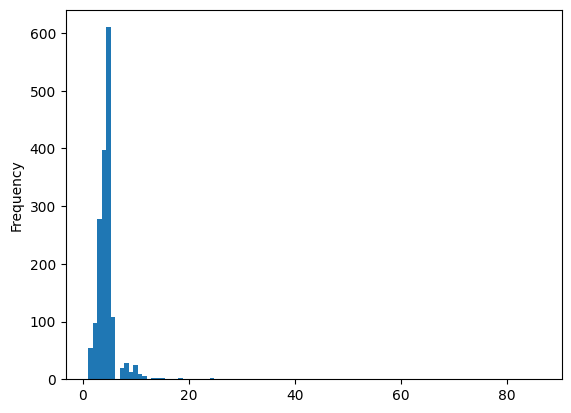

In [49]:
lesson_count_by_collection["lesson_count"].plot.hist(bins=100)

In [50]:
lesson_count_by_collection["lesson_count"].value_counts()

lesson_count
5     610
4     398
3     277
6     108
2      98
1      54
8      29
10     25
7      19
9      12
11      9
12      6
13      3
15      3
18      2
14      2
24      2
42      1
28      1
45      1
86      1
20      1
22      1
Name: count, dtype: int64

In [ ]:
# lesson_df = pd.read_csv('../Lesson/lessons_with_id.csv')

# limit_lesson = 3

# lesson_series = []

# index = 0

# while index < len(lesson_df):
#     num_of_lessons = 0
    
#     current_collection_id = lesson_df.iloc[index]["Collection ID"]
    
#     while index < len(lesson_df) and num_of_lessons < limit_lesson and lesson_df.iloc[index]["Collection ID"] == current_collection_id:
#         lesson_series.append(lesson_df.iloc[index])
#         num_of_lessons += 1
#         index += 1
      
#     if index >= len(lesson_df):
#         break
    
#     if lesson_df.iloc[index]["Collection ID"] == current_collection_id:
#         # Go to next"Collection id
#         while index < len(lesson_df) and lesson_df.iloc[index]["Collection ID"] == current_collection_id:
#             index += 1
        
        
# # Create a new dataframe
# lesson_limit = pd.DataFrame(lesson_series)
# lesson_limit.head()

,Lesson Name,Lesson Link,Collection ID,Lesson ID
0,Prologue–Chapter 1,/lists/6078029,1,1
1,Chapters 2–3,/lists/6078030,1,2
2,Chapters 4–5,/lists/6078037,1,3
4,February Vocabulary Words,/lists/7626191,2,5
5,This Week in Words: Current Events Vocab for F...,/lists/9724276,2,6


In [ ]:
# # Count the number of words

# raw_word_df = pd.read_csv("raw_word_df_limit.csv")
# retain_lesson_id = lesson_limit["Lesson ID"].unique()
# raw_word_df_new = raw_word_df[raw_word_df["Lesson ID"].isin(retain_lesson_id)]


In [3]:
raw_word_df_limit = pd.read_csv("raw_word_df_limit.csv")
raw_word_df_limit["Word"].nunique()

14880

In [4]:
raw_word_df_limit.head()

,Word,Lesson ID
0,dignity,1
1,saunter,1
2,manuscript,1
3,reside,1
4,sufficient,1


<Axes: ylabel='Frequency'>

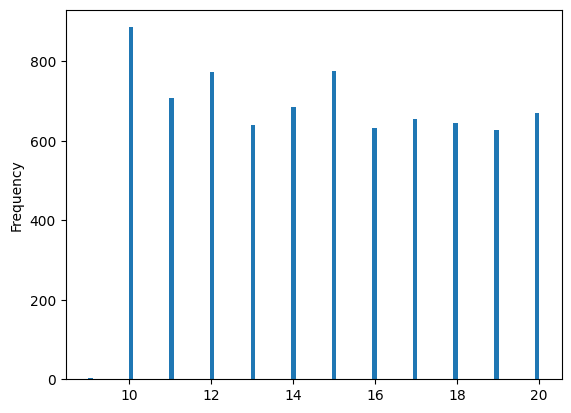

In [4]:
raw_word_df_count = raw_word_df_limit.groupby(by='Lesson ID').size().reset_index(name='word_count')
raw_word_df_count["word_count"].plot.hist(bins=100)


In [5]:
raw_word_df_limit['Lesson ID'].nunique()

7704

In [6]:
unique_word = pd.DataFrame(raw_word_df_limit["Word"].unique(), columns=["Word"])
print("Unique words", len(unique_word))
unique_word.head()

Unique words 14880


,Word
0,dignity
1,saunter
2,manuscript
3,reside
4,sufficient


In [ ]:
unique_word["Word"] = unique_word["Word"].str.lower()
unique_word.to_csv("unique_words.csv", index=False)

# 3. Crawl word details

## 3.1 Get word info from dunno

In [2]:
from crawl_dunno import *

In [2]:
from crawl_zim import *

In [3]:
unique_words = pd.read_csv("unique_words.csv")
print("Unique words", len(unique_words))

Unique words 14880


In [4]:
# Get word more than 2 syllable
unique_words["Syllable"] = unique_words["Word"].apply(lambda x: len(x.split(" ")))

In [5]:
driver = init_driver()
word_info = crawl_dunno_word("pelt", driver)
driver.quit()
word_info

{'word': 'pelt',
 'pronunciation': '[pelt]',
 'pronunciation_audio': 'https://data.dunno.ai/audios/envi/us/47c0bed6c958825af4fe24909a9b5ce8.mp3',
 'part_of_speech': 'Verb (4)',
 'meaning': 'sự ném loạn xạ, sự bắn loạn xạ',
 'example': None,
 'example_meaning': None,
 'thumbnail': 'https://th.bing.com/th?q=pelt&c=7&rs=1&p=0&o=5&dpr=2&pid=1.7&mkt=en-WW&cc=VN&setlang=en&adlt=moderate&t=1',
 'example_audio': None,
 'definition': 'Hurl missiles repeatedly at.'}

In [4]:
chunks = split_df_into_chunks(unique_words[0:50], 10)
len(chunks[0])

5

In [7]:
chunks[0].head(2)

,Word
0,dignity
1,saunter


In [5]:
processes = []
output_dir = "word_info_chunks"
try:
    for index, chunk in enumerate(chunks):
        output_path = f"{output_dir}/chunk_{index}.csv"
        p = Process(target=get_and_save_word_info, args=(chunk, output_path, index))
        processes.append(p)
        p.start()
        print(f"Started process for chunk {index}")
        sleep(2) # Wait for initializing the driver
        
    for index, p in enumerate(processes):
        p.join()
        print(f"Process {index} finished")
except Exception as e:
    for index, p in enumerate(processes):
        p.terminate()
        print(f"Process {index} finished")

Started process for chunk 0
Processing word chunk 0 - 1/5: dignity
Started process for chunk 1
Processing word chunk 1 - 1/5: warrant
Started process for chunk 2
Processing word chunk 0 - 2/5: saunter
Processing word chunk 2 - 1/5: bound
Processing word chunk 0 - 3/5: manuscript
Started process for chunk 3
Processing word chunk 3 - 1/5: obscure
Processing word chunk 0 - 4/5: reside
Processing word chunk 1 - 2/5: admonition
Started process for chunk 4
Processing word chunk 4 - 1/5: supernatural
Processing word chunk 0 - 5/5: sufficient
Processing word chunk 1 - 3/5: digress
Started process for chunk 5
Processing word chunk 2 - 2/5: tranquil
Processing word chunk 5 - 1/5: compel
Processing word chunk 1 - 4/5: pelt
Started process for chunk 6
Processing word chunk 6 - 1/5: disdain
Processing word chunk 2 - 3/5: bracket
Processing word chunk 1 - 5/5: reverie
Started process for chunk 7
Processing word chunk 4 - 2/5: vivid
Processing word chunk 2 - 4/5: usher
Processing word chunk 7 - 1/5: 

In [10]:
for index, p in enumerate(processes):
    p.terminate()
    print(f"Process {index} finished")

Process 0 finished
Process 1 finished


In [1]:
# Combine these chunk outputs
chunk_dfs = []

for i in range(len(chunks)):
    chunk_df = pd.read_csv(f"{output_dir}/chunk_{i}.csv")
    chunk_dfs.append(chunk_df)
    
len(chunk_dfs)

NameError: name 'chunks' is not defined